In [75]:
using IntervalArithmetic
using LaTeXStrings
using Plots

In [82]:
include("./heatmap/index.jl")
include("./method2/index.jl")
include("./intervalPCM/index.jl")
include("./twofoldInterval/index.jl")
include("./twofoldIntervalPCM/index.jl")

print()

In [83]:
function  method2(A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}) where {T <: Real}
    εᶿ = solveIndividualCancellingLP_m2([A₁, A₂])
    result = solveApproximationLP_m2([A₁, A₂], εᶿ)
    A = importance2TwofoldIntervalPCM_m2(result)
    return A
end

method2 (generic function with 1 method)

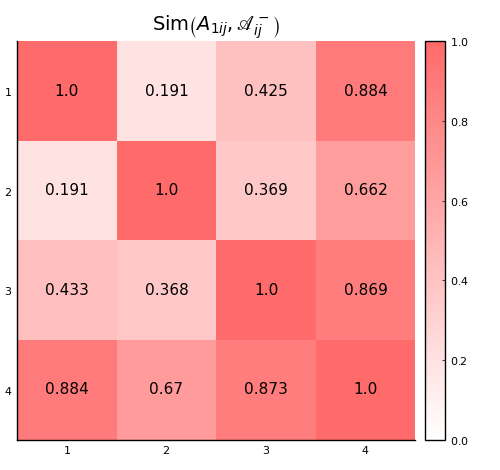

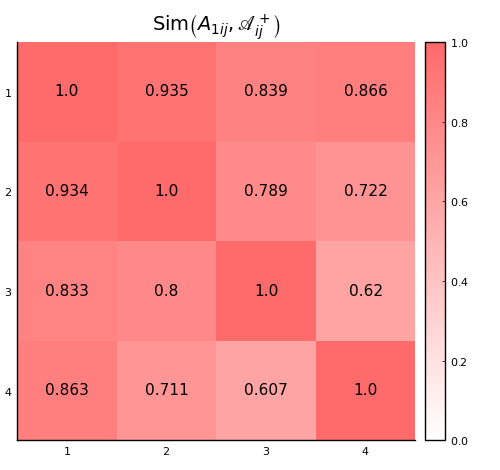

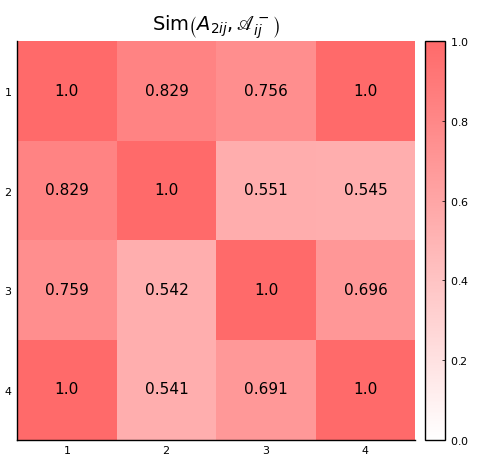

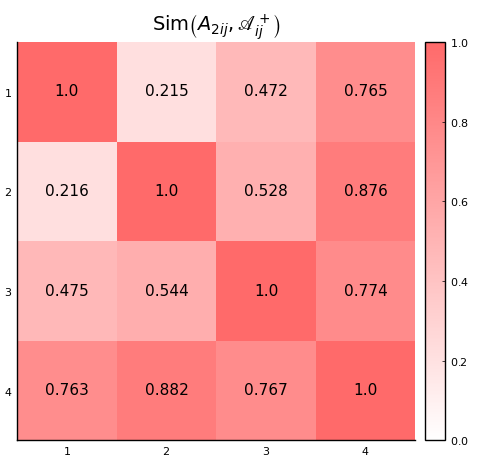

4-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing

In [92]:
A = [
    1 2 4 4
    1/2 1 2 2
    1/4 1/2 1 1
    1/4 1/2 1 1
]

A₁ = randamizedIntervalPCM(A, 1234, 3e-2)
A₂ = randamizedIntervalPCM(A, 134, 3e-2)

Â = method2(A₁, A₂)
Â⁻, Â⁺ = twofoldIntervalMatrix2intervalMatrices(Â)

heatmap₁⁻, indices₁⁻ = plotConincidenceIndices(A₁, Â⁻, L"{\rm Sim} \left( A_{1ij}, \mathscr{A}_{ij}^- \right)")
heatmap₁⁺, indices₁⁺ = plotConincidenceIndices(A₁, Â⁺, L"{\rm Sim} \left( A_{1ij}, \mathscr{A}_{ij}^+ \right)")
heatmap₂⁻, indices₂⁻ = plotConincidenceIndices(A₂, Â⁻, L"{\rm Sim} \left( A_{2ij}, \mathscr{A}_{ij}^- \right)")
heatmap₂⁺, indices₂⁺ = plotConincidenceIndices(A₂, Â⁺, L"{\rm Sim} \left( A_{2ij}, \mathscr{A}_{ij}^+ \right)")

# plot([heatmap₁⁻, heatmap₁⁺, heatmap₂⁻, heatmap₂⁺]..., size=(800, 800), legend=false)
display.(plot.([heatmap₁⁻, heatmap₁⁺, heatmap₂⁻, heatmap₂⁺], size=(500, 470)))